In [128]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [129]:
#df 불러오기
df = pd.read_excel('./df.xlsx')

# 딕셔너리 다루기
a = {'122630': {'종목명': 'KODEX 레버리지', '스크린번호': '5001', '주문용스크린번호': '6001'}, 
     '252670': {'종목명': 'KODEX 200선물인버스2X', '스크린번호': '5001', '주문용스크린번호': '6001'}}

#시간 확인
now = datetime.now()    
current_time = now.strftime("%H%M%S.%f")
float(current_time[-9:])

#시간차 계산
now2 = datetime.now()
delta_time = now2 - now
delta_time = delta_time.total_seconds()  
type(delta_time)


float

### log 파일 불러와서 데이터 확인하기

In [131]:
testFile = open('logs.log','rt')
fileLines = testFile.readlines()
temp = []

date = '14'

for line in fileLines: 
  
    if line.split(' ')[0][-2:] == date and int(line.split(' ')[1][3:5]) >= 46 :
        temp.append(line)
    if line.split(' ')[0][-2:] == date and line.split(' ')[1][:5] == '15:19':
        break
   
testFile.close()

temp_dict = {'KODEX 레버리지' : {},
             '레버리지 cci' : {},
             'KODEX 200선물인버스2X' : {},
             '인버스 cci' : {}
             }

for line in temp:
    line = line.split(' ')
    if line[3][:4] =='레버리지':
        temp_dict['KODEX 레버리지'].update({line[1][0:5] : float(line[-4][-5:])})
        temp_dict['레버리지 cci'].update({line[1][0:5] : float(line[-1][1:-2])})
                                        
    else:
        temp_dict['KODEX 200선물인버스2X'].update({line[1][0:5] : float(line[-4][-4:])})
        temp_dict['인버스 cci'].update({line[1][0:5] : float(line[-1][1:-2])})
        
temp_dict

df = pd.DataFrame(temp_dict)
df = df.fillna(method='ffill')
df

,KODEX 레버리지,레버리지 cci,KODEX 200선물인버스2X,인버스 cci
09:46,15660.0,47.7,2790.0,-56.5
09:47,15675.0,54.7,2790.0,-56.5
09:48,15685.0,59.4,2785.0,-69.1
09:49,15690.0,61.8,2785.0,-69.1
09:50,15700.0,66.4,2785.0,-69.1
...,...,...,...,...
14:56,15630.0,-33.4,2795.0,0.9
14:57,15635.0,-26.0,2795.0,0.9
14:58,15630.0,-33.4,2795.0,0.9
14:59,15625.0,-34.6,2795.0,-5.4


### 가격과 cci 그래프 그리기

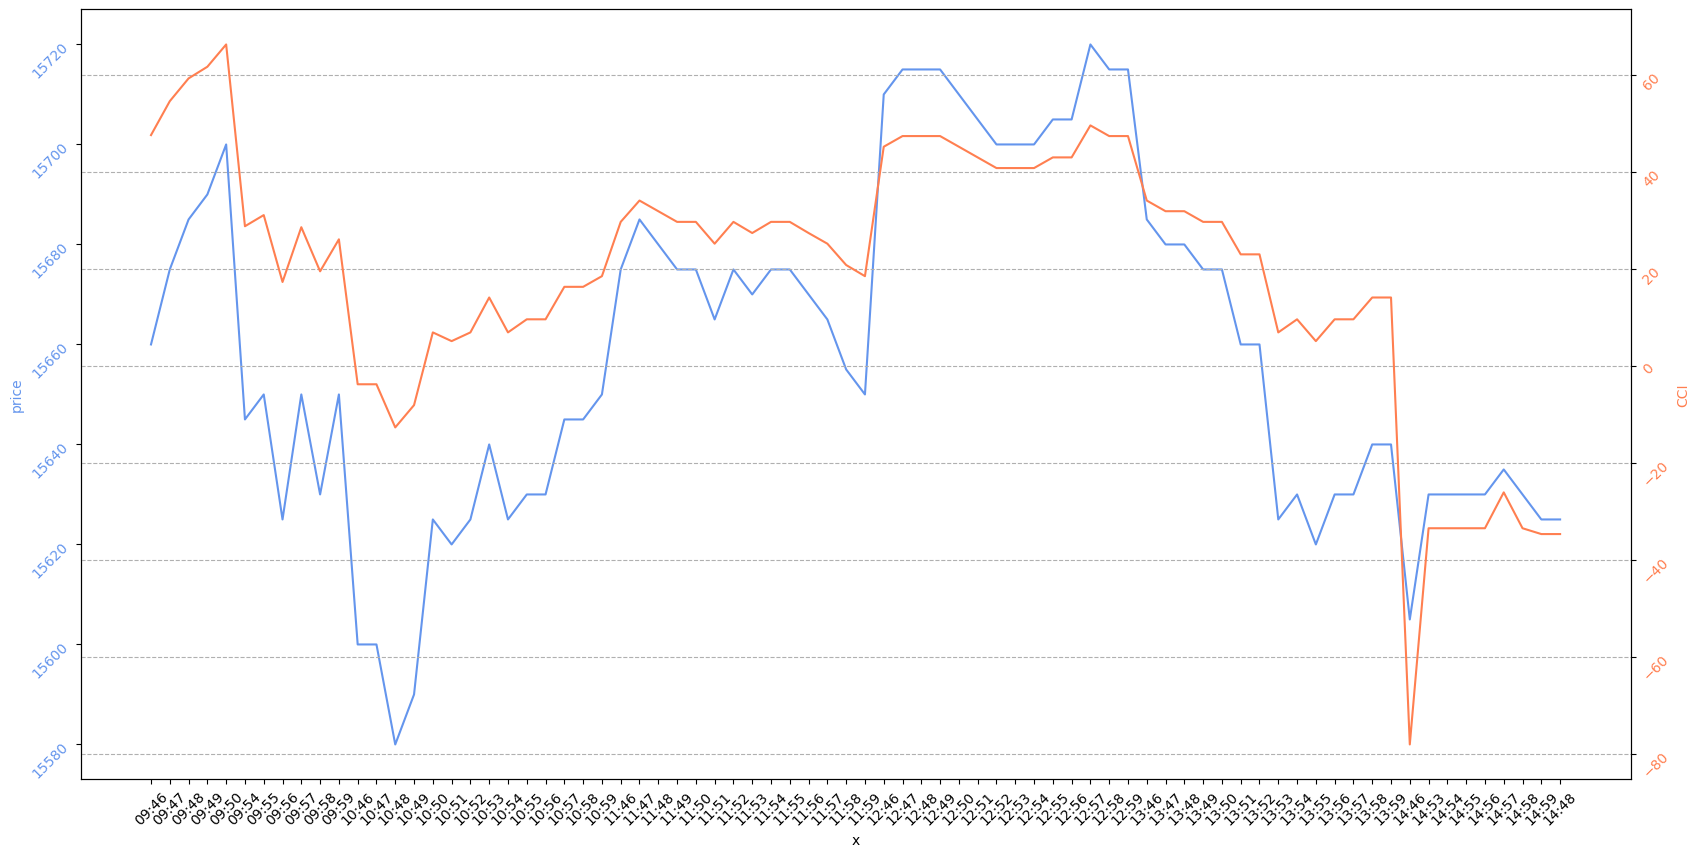

In [127]:
fig = plt.figure(figsize=(20,10)) ## 캔버스 생성
fig.set_facecolor('white')
ax1 = fig.add_subplot() ## axes 생성
 
color1 = 'cornflowerblue'
ax1.plot(df.index, df['KODEX 레버리지'], color=color1)
ax1.set_xlabel('x')
ax1.set_ylabel('price', color=color1)
ax1.tick_params(axis='x', labelrotation = 45) 
ax1.tick_params(axis='y', labelcolor=color1,labelrotation = 45)


color2 = 'coral'
ax2 = ax1.twinx()
ax2.plot(df.index, df['레버리지 cci'], color=color2)
ax2.set_ylabel('CCI', color=color2)
ax2.tick_params(axis='x', labelrotation = 45) 
ax2.tick_params(axis='y', labelcolor=color2,labelrotation = 45)
 
plt.grid(True,  linestyle='--')
plt.show()